In [8]:
input_file = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/13%EC%A3%BC%EC%B0%A8/data/data_imbalance.txt'

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#  '/content/drive/MyDrive/Colab Notebooks/utilities'
from utilities import visualize_classifier

In [22]:
# 데이터 로드
data = pd.read_csv(input_file,header=None).to_numpy()
data = np.loadtxt(input_file,delimiter=',')

In [24]:
data[:3]

array([[5.66, 6.77, 1.  ],
       [4.4 , 5.05, 0.  ],
       [3.52, 4.73, 1.  ]])

In [25]:
# 데이터편향 : 보통 10배이상 차이나면
X = data[:,:-1]
y = data[:,-1]
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

In [41]:
def myFunc(a,b,c,d):
  print(a,b,c,d)

params = { 'a':10, 'b':20, 'c':100, 'd':150 }

# myFunc(a=1,b=2,c=3,d=4)
myFunc(**params)

10 20 100 150


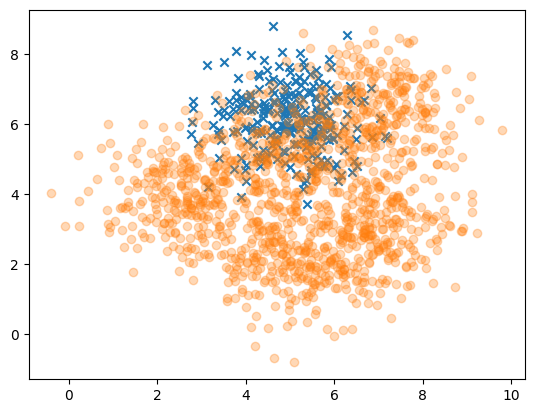

In [36]:
# 입력데이터의 2차원 시각화
import matplotlib.pyplot as plt
plt.scatter(class_0[:,0],class_0[:,1],marker='x')
plt.scatter(class_1[:,0],class_1[:,1],marker='o',alpha=0.3)
plt.show()

In [37]:
# 훈련세트와 테스트세트 분류
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

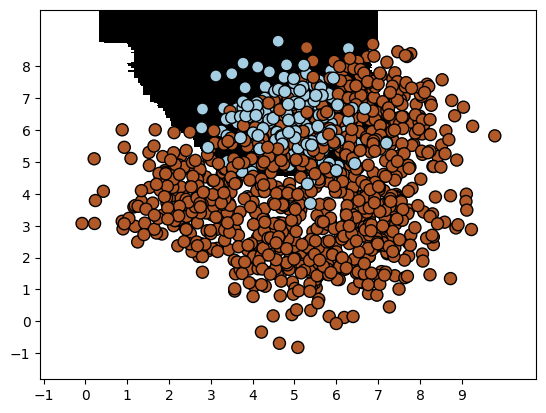

In [46]:
params = {
    'n_estimators' : 100, 'max_depth' : 4, 'random_state' : 0,'class_weight':'balanced'
}
classifier =  ExtraTreesClassifier(**params)
classifier.fit(x_train, y_train)
visualize_classifier(classifier,x_train,y_train)

In [44]:
classifier.score(x_test,y_test)

0.8533333333333334

In [49]:
# 분류기의 성능 계산
print(classification_report(y_train, classifier.predict(x_train), target_names=['class_0','class_1']))
print(classification_report(y_test, classifier.predict(x_test), target_names=['class_0','class_1']))

              precision    recall  f1-score   support

     class_0       0.46      0.92      0.61       206
     class_1       0.98      0.77      0.86       994

    accuracy                           0.80      1200
   macro avg       0.72      0.85      0.74      1200
weighted avg       0.89      0.80      0.82      1200

              precision    recall  f1-score   support

     class_0       0.40      0.89      0.55        44
     class_1       0.98      0.77      0.86       256

    accuracy                           0.79       300
   macro avg       0.69      0.83      0.71       300
weighted avg       0.89      0.79      0.82       300

